# Connectionist Neurons and Multi Layer Perceptrons

## T2.1 Terminology

1. a connectionist neuron computes any input into a binary output. 
 1. Itself is a mathematical function that computes the weighted average of its input, 
 - sum is passed through a nonlinear function (activation function => sigmoid function)
 
Further explanation: A neuron consists of a function f(x1, x2, ..., xn), a sigmoid function which uses f as input and gives a binary output and a weight factor which is multiplied with with the sigmoid function and determines how much this neuron is considered for the output of the layer. 
![alt](data/neuron.png)

2.) The effects of the weights and bias 
1. bias allows you to shift the activation function to the left or right (critical for successful learning
2. weights are parameters to adjust our learning function. They get adjusted during training towards the right output. 

Further explanaition: Weights are initiallized randomly. 

3) Why is a non linear transfer function beneficial compared to a linear one?

4) What is a feedforward multilaywer perceptron (MLP)?

## H2.1 Connectionist Neuron

In [1]:
# Setup dependencies
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import pandas as pd

In [2]:
# load data
df = pd.read_csv('data/applesOranges.csv').astype(float)
df.describe()

,x.1,x.2,y
count,200.000000,200.000000,200.000000
mean,0.252160,0.241115,0.500000
std,0.560932,0.577747,0.501255
min,-1.335000,-1.032000,0.000000
25%,-0.137000,-0.193000,0.000000
50%,0.219500,0.256000,0.500000
75%,0.621000,0.661750,1.000000
max,2.059000,1.610000,1.000000


In [3]:
df.head()

,x.1,x.2,y
0,0.365,0.708,0.0
1,0.543,-0.268,0.0
2,-0.401,0.643,0.0
3,0.866,-0.796,0.0
4,-0.386,0.742,0.0


In [4]:
df.tail()

,x.1,x.2,y
195,0.784,0.616,1.0
196,0.411,-0.005,1.0
197,0.930,0.225,1.0
198,1.288,0.184,1.0
199,0.110,1.114,1.0


In [5]:
df.dtypes

x.1    float64
x.2    float64
y      float64
dtype: object

In [6]:
# split data
X = df.drop('y', axis=1)
y = df.y

### a.)

In [7]:
def plot(X, y, title):
    colors = ['orange' if label==1 else 'green' for label in y]
    plt.scatter(X['x.1'], X['x.2'], color=colors, s=50)
       
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    plt.title(title)
    plt.axis("equal")
    plt.xlim([-2.5,2.5])
    plt.ylim([-1.5, 2])
    plt.grid()

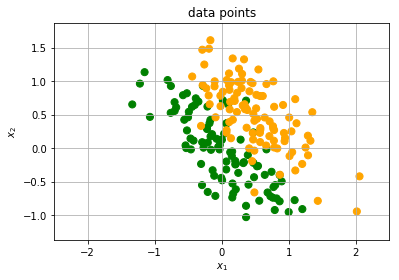

In [8]:
plot(X,y,'data points')

### b)

In [9]:
def create_weight(alpha):
    rad = np.radians(alpha)
    weight = np.array((np.cos(rad), np.sin(rad)))
    return weight

In [10]:
def f(x, w, theta):
    return (np.sign(w.dot(x) + theta) + 1) / 2

In [25]:
def calcuclate_error(y, x, w, theta):
    error = np.abs(y - f(x, w, theta))
    return error

In [26]:
def calculate_performance(errors):
    performance = np.average([1 - round(e) for e in errors])
    return performance

In [27]:
# convert dataframe into numpy array
data = df.values

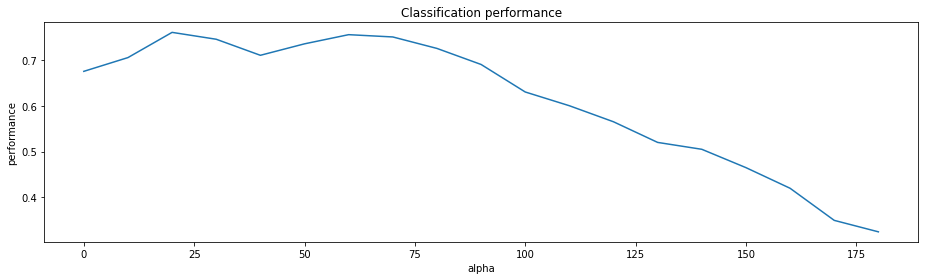

In [28]:
theta = 0
alphas = range(0,181,10)
performances = []

for alpha in alphas:
    w = create_weight(alpha)
    #errors = [caluclate_error(y, (x1,x2), w, theta) for x1,x2,y in zip(X['x.1'], X['x.2'],y)]
    errors = [caluclate_error(y, (x1,x2), w, theta) for x1,x2,y in zip(data[:,0], data[:,1],y)]
    performance = calculate_performance(errors)
    performances.append( (alpha, performance) )
    
figure, axes = plt.subplots(1, 1, figsize=(13, 4))
label='Classification performance'
mapping = np.array(performances).T
axes.plot(mapping[0], mapping[1])
axes.set_title(label)
axes.set_xlabel('alpha')
axes.set_ylabel('performance')
figure.tight_layout()

## c)

In [29]:
# get alpha with best performance 
alpha = max(performances, key = lambda x: x[1])[0]
alpha

20

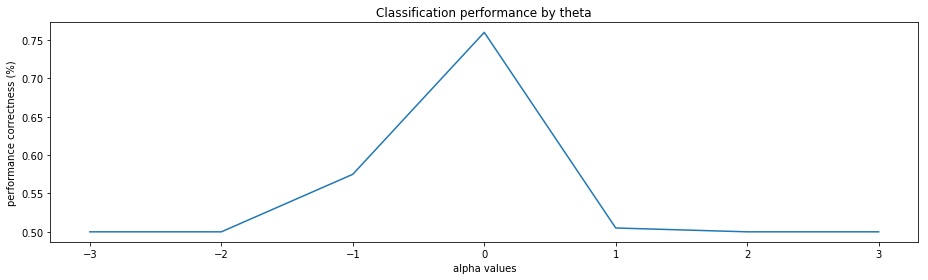

In [30]:
# Exercise 1.c
thetas = range(-3, 4) # -3 to 3
w = create_weight(alpha)
performances_theta = []

for theta in thetas:
    errors = [calcuclate_error(yT, (x1,x2), w, theta) for x1,x2,yT in data]
    performance = calculate_performance(errors)
    performances_theta.append((theta, performance))
    
figure, axes = plt.subplots(1, 1, figsize=(13, 4))
label='Classification performance by theta'
mapping = np.array(performances_theta).T
axes.plot(mapping[0], mapping[1])
axes.set_title(label)
axes.set_xlabel('alpha values')
axes.set_ylabel('performance correctness (%)')
figure.tight_layout()

## d)

Parameters: Alpha = 20, Theta = 0, Error rate = 0.24


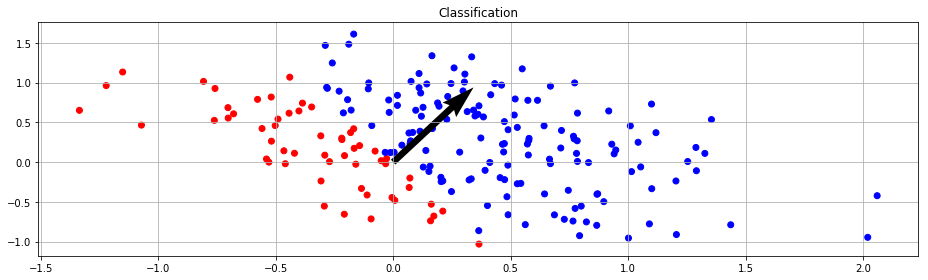

In [31]:
# get best performance thaeta and alpha
theta = max(performances_theta, key = lambda x: x[1])[0]
alpha = max(performances, key = lambda x: x[1])[0]
w = create_weight(alpha)

figure, axes = plt.subplots(1, 1, figsize=(13, 4))
classification = [f((x1,x2), w, theta) for x1, x2, yT in data]
# calculate average error 
errors = [calcuclate_error(yT, (x1,x2), w, theta) for x1, x2, yT in data]
eT = np.average(errors)

# plot scatter
colors = ['red' if x==0 else 'blue' for x in classification]
mapping = data.T
axes.scatter(mapping[0], mapping[1], color=colors)
axes.set_title('Classification')
axes.quiver(0, 0, w[1], w[0], angles='xy', scale_units='xy', scale=1)
axes.grid()
figure.tight_layout()

print('Parameters: Alpha = {}, Theta = {}, Error rate = {}'.format(alpha, theta, eT))

## Interpretation
Weight vector defines if a datapoint is on the left or the right side of it. In the end the scalara product of the weighting vector on a data point returns a positive or a negative number.
By applying the sign function to the return value you get one of two possible values defining the label of the given data point.

The optimized parameters alpha and theta define the weight vector such that the resulting separating line is close to the optimal solution. Because there is only one applied connectionist neuron there is only a linear separating line which doesn't fit exactly to the given measurements. 

## e)

Best parameters: Alpha = 45, Theta = -0.40, Error rate = 0.09


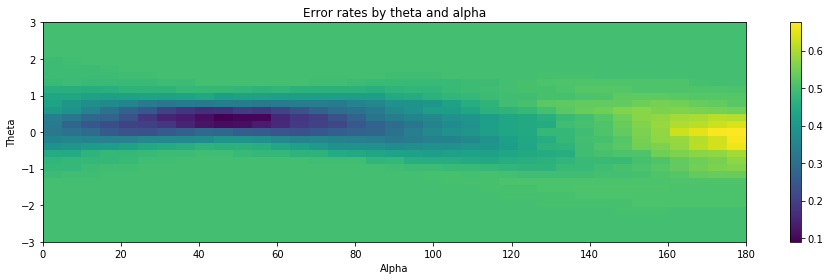

In [34]:
thetas = np.arange(-3, 3.1, 0.2)
alphas = range(0, 181, 5)
results = []
min_value = 1
best_params = None

for alpha in alphas:
    w = create_weight(alpha)
    row = []
    for theta in thetas:
        error = [calcuclate_error(yT, (x1, x2), w, theta) for x1, x2, yT in data]
        eT = np.average(error)
        row.append(eT)
        if eT < min_value:
            best_params = (alpha, theta)
            min_value = eT
    results.append(row)


figure, axes = plt.subplots(1, 1, figsize= (13, 4))
cax = axes.imshow(np.array(results).T, extent=[0, 180, -3, 3], aspect='auto')
figure.colorbar(cax)
axes.set_title('Error rates by theta and alpha')
axes.set_ylabel('Theta')
axes.set_xlabel('Alpha')
figure.tight_layout()

print('Best parameters: Alpha = {}, Theta = {:.2f}, Error rate = {}'.format(*best_params, min_value))